<a href="https://colab.research.google.com/github/yagohilario1992/Data_Science/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção do dados

Os dados utilizados para as analises foi obtido pelo dataset disponibilizado pelo, COVID-19 Data Repository do Centro de Ciência e Engenharia de Sistemas (CSSE) da Universidade Johns Hopkins (JHU), que é atualizado constantemente. O dataset pode ser encontrado [aqui](https://github.com/owid/covid-19-data/tree/master/public/data)

Para discorrer as seguintes analises usaremos apenas o dataset referido, a fim de minimizar conflitos entre dados, fornecidos por governos municipais, estaduais, bem como dados não oficiais.

Esse notebook terá com enfoque o **Brasil**. 

#### O primeiro passo é importar todas as bibliotecas necessarias.

In [54]:
# importar as bibliotecas necessárias
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%matplotlib inline

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df.date = pd.to_datetime(df.date)



#### Observando as primeira entradas para se ter uma ideia do DataFrame

In [55]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


# Dicionario do Variáveis
+ `date`: **data**
+ `iso_code`: **Iniciais do País**
+ `continent`: **Continente**
+ `location`: **País**
+ `total_cases`: **Total de casos**
+ `new_cases`: **Caso novos**
+ `new_cases_smoothed`: **Novos casos suavizados**
+ `total_deaths`: **Total de mortos**
+ `new_deaths_smoothed`: **Novas mortes suavizados**
+ `Total_cases per_milion`: **Total de casos por milhão de habitantes**
+ `new_cases_per_million`: **Novos casos por milhão de habitantes**
+ `new_cases_smoothed_per_million`: **Novos casos por milhão de habitantes suavizado**
+ `total_deaths_per_million`: **Total de morte por milhão de habitantes**
+ `new_deaths_per_million`: **Novas mortes por milhão de habitantes**
+ `new_deaths_smoothed_per_million`: **Novas mortes por milhão de habitantes suavizada**
+ `reproduction_rate`: **Taxa de transmissão**
+ `icu_patients`: **Pacientes internados em ICU (*intensive care unit*)**
+ `icu_patients_per_million	`: **Pacientes internados em ICU (*intensive care unit*) por milhão de habitantes**
+ `hosp_patients`: **Pacientes hospitalizados**
+ `hosp_patients_per_million`: **Pacientes hospitalizados por milhão de habitantes**
+ `weekly_icu_admissions`: **admissões semanais de UTI**
+ `weekly_icu_admissions_per_million`: **admissões semanais de UTI por milhão de habitantes**
+ `weekly_hosp_admissions`: **Adimissões semanais hospitalares**
+ `weekly_hosp_admissions_per_million`: **Adimissões semanais hospitalares por milhão de habitantes**
+ `new_tests`: **Novos testes**
+ `total_tests`: **Total de testes**
+ `total_tests_per_thousand`: **Total de teste por mil habitantes**
+ `new_tests_per_thousand`: **Novos teste realizados por mil habitantes**
+ `new_tests_smoothed`: **Novos testes suavizados**
+ `new_tests_smoothed_per_thousand`: **Novos teste suavizados por mil hebitantes**
+ `positive_rate`: **Taxa de positivados**
+ `tests_per_case`: **Testes por caso**
+ `tests_units`: **testes unitarios**
+ `total_vaccinations`: **Vacinação total**
+ `people_vaccinated`: **Pessoas vacinadas**
+ `people_fully_vaccinated`: **Pessoas totalmente vacinadas**
+ `new_vaccinations`: **Novas vacinações**
+ `new_vaccinations_smoothed`: **Novas vacinações suavizadas**
+ `total_vaccinations_per_hundred`: **Total porcentacem de vacinados**
+ `people_vaccinated_per_hundred`: **Porcentagem de pessoas vacinadas**
+ `people_fully_vaccinated_per_hundred`: **Porcentagem de pessoas totalmente vacinadas**
+ `new_vaccinations_smoothed_per_million`: **Novas vacinações suavizadas por milhão de habitantes**
+ `stringency_index`: **Indicie de rigor**
+ `population`: **População**
+ `population_density`: **Densidade populacional**
+ `median_age`: **Media de idades**
+ `aged_65_older`: **Pessoas acima de 65 anos**
+ `aged_70_older`: **Pessoas acima de 70 anos**
+ `gdp_per_capita`: **PIB per capita**
+ `extreme_poverty`: **Extrema pobreza**
+ `cardiovasc_death_rate`: **Taxa de morte por cardiovasculares**
+ `diabetes_prevalence`: **Prevalencia de diabetes**
+ `female_smokers`: **Mulheres fumantes**
+ `male_smokers`: **Homens fumantes**
+ `handwashing_facilities`: **instalações para higienizar as mãos**
+ `hospital_beds_per_thousand`: **Leitos hospitalares por mil habitantes**
+ `life_expectancy`: **expectativa de vida**
+ `human_development_index`: **Indicie de desenvolvimento humano - IDH**



## Inicio das analises no Brasil

Para analises do Covid-19 no Brasil vamos criar um novo DataFrame a partir do que foi previamente carregado.

#### Criando um *Dataframe* para o Brasil a partir do global.

In [56]:
df_Brazil = df.loc[df["location"] == "Brazil"].copy()
df_Brazil.set_index('date', inplace=True)

#### Visualizando as primeiras entradas

In [57]:
df_Brazil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


#### Número de entradas

In [58]:
df_Brazil.shape

(355, 58)

#### O *DataFrame* do Brasil conta com 353 linhas e 58 colunas

#### Tipos de entradas

In [59]:
df_Brazil.dtypes

iso_code                                  object
continent                                 object
location                                  object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_million                float64
weekly_icu_admission

#### Verificando valores ausentes

In [60]:
((df_Brazil.isnull().sum() / df_Brazil.shape[0]) * 100).sort_values(ascending=False)

weekly_hosp_admissions                   100.000000
new_tests_per_thousand                   100.000000
icu_patients                             100.000000
handwashing_facilities                   100.000000
icu_patients_per_million                 100.000000
hosp_patients                            100.000000
hosp_patients_per_million                100.000000
weekly_icu_admissions                    100.000000
weekly_icu_admissions_per_million        100.000000
positive_rate                            100.000000
weekly_hosp_admissions_per_million       100.000000
new_tests                                100.000000
tests_per_case                           100.000000
people_fully_vaccinated                   97.464789
people_fully_vaccinated_per_hundred       97.464789
total_tests_per_thousand                  95.492958
total_tests                               95.492958
new_vaccinations_smoothed                 91.830986
new_vaccinations                          91.830986
new_vaccinat

As seguites entradas tem 100% de valores ausentes outras com valores muito elevados, algumas entradas como as relacionadas as vacinas tem pouca entrada pois estão sendo preenchidas recentemente, sendo assim  as demais seram excluidadas do *DataFrame*.

+ weekly_hosp_admissions                 
+ new_tests_per_thousand                   
+ icu_patients                             
+ handwashing_facilities                   
+ icu_patients_per_million                 
+ hosp_patients                            
+ hosp_patients_per_million                
+ weekly_icu_admissions                    
+ weekly_icu_admissions_per_million        
+ positive_rate                            
+ weekly_hosp_admissions_per_million       
+ new_tests                                
+ tests_per_case    
+ new_tests_smoothed_per_thousand 
+ new_tests_smoothed   
+ total_tests_per_thousand                  
+ total_tests                     

In [61]:
df_Brazil_clean = df_Brazil.drop(["weekly_hosp_admissions",
                                  "new_tests_per_thousand",
                                  "icu_patients",
                                  "handwashing_facilities",
                                  "icu_patients_per_million",
                                  "hosp_patients",
                                  "hosp_patients_per_million",
                                  "weekly_icu_admissions",
                                  "new_tests",
                                  "tests_per_case",
                                  "new_tests_smoothed_per_thousand",
                                  "new_tests_smoothed",
                                  "total_tests_per_thousand", 
                                  "total_tests"], axis=1)

Feita a limpeza nas entradas vazias passamos aos gráficos.

# Visualizações para o Brasil.

A seguir veremos alguns gráficos que nos ajudaram a observar a progressão do Covid-19 noo Brasil.

In [62]:
df_Brazil_clean.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,positive_rate,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765


#### Casos x Mortes

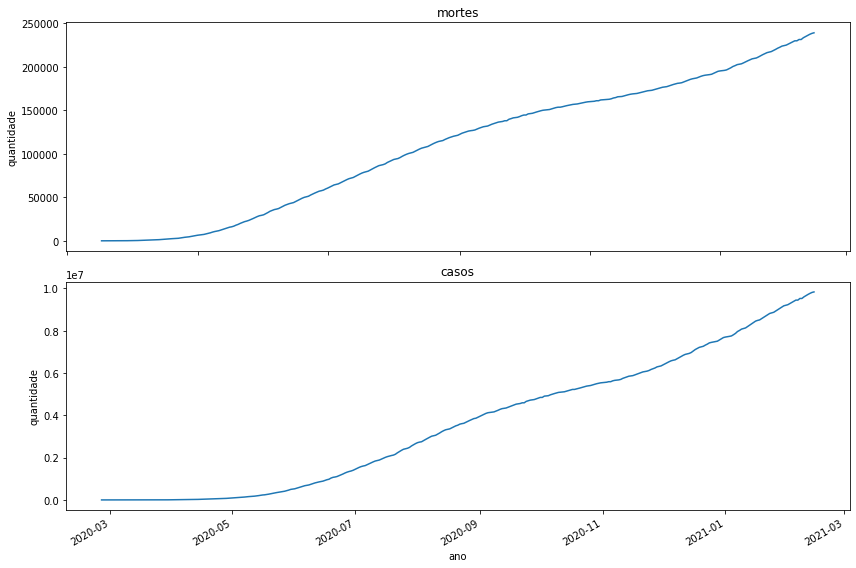

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))


ax[0].plot('total_deaths', data=df_Brazil_clean )

ax[0].set_title("mortes")
ax[0].set_ylabel("quantidade")
ax[0].set_xlabel("ano")

ax[1].plot('total_cases', data=df_Brazil_clean )

ax[1].set_title("casos")
ax[1].set_ylabel("quantidade")
ax[1].set_xlabel("ano")

fig.autofmt_xdate()
plt.tight_layout()

Como podemos observar acima ambos os gráficos seguem uma tendecia de alta. Nos dois caso o crecimento foi mais acentuado a partir do mês de maio de 2020.

#### Maior número de infectados em 24h.

In [64]:
max_caso = df_Brazil_clean.loc[df_Brazil_clean["new_cases"] == (df_Brazil_clean["new_cases"].max())].copy()
max_caso

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,positive_rate,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-07,BRA,South America,Brazil,7961673.0,87843.0,40814.286,200498.0,1524.0,792.714,37456.225,413.263,192.014,943.256,7.17,3.729,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.57,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765


O Brasil apresentou o maior número de infectados no dia 07 de janeiro de 2021, com um total de 87.843 novos caso confirmados.

### Gráfico de novos casos.

In [65]:
# converter DATE para datetime e associar ao index do dataframe
max_caso.index = pd.to_datetime(max_caso.index, format="%m-%d-%Y")

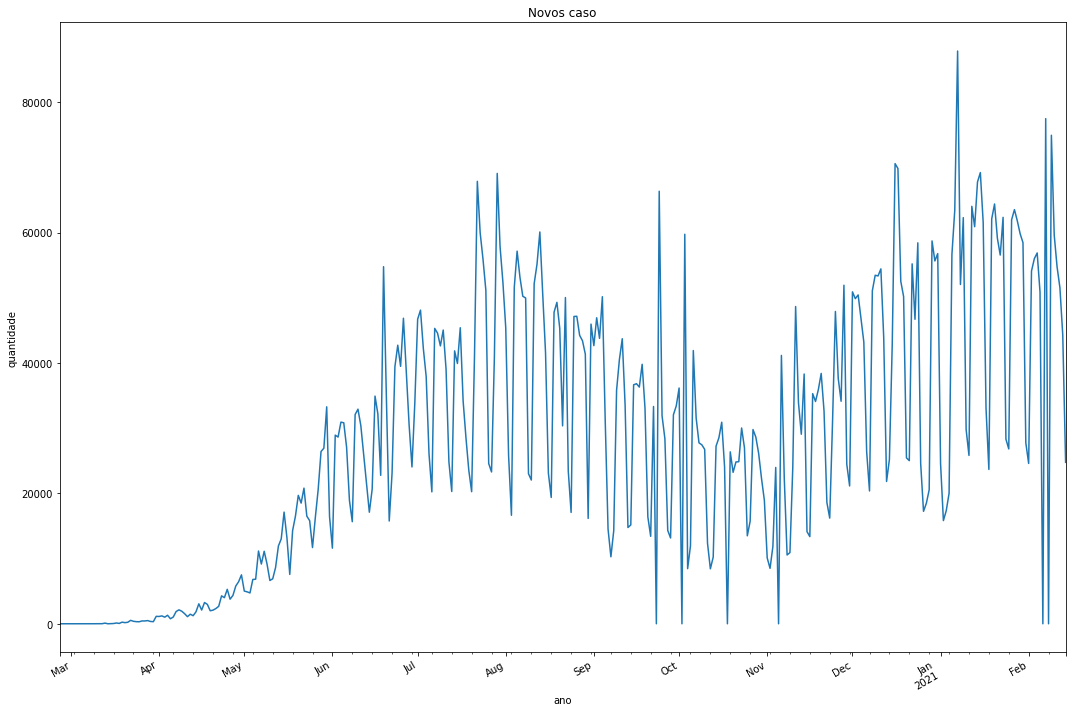

In [66]:
fig, ax = plt.subplots(figsize=(15,10))

df_Brazil_clean["new_cases"].plot(kind='line') 



ax.set_title("Novos caso")
ax.set_ylabel("quantidade")
ax.set_xlabel("ano")

fig.autofmt_xdate()
plt.tight_layout()

No gráfico acima podemos obsevar a curva de contagio, onde houve periodos de picos, e de redução.


Há muito ruido dificultando a leitura, a seguir plotaremos um grafico de tendencia para entender melhor o ritmo de contaminação.

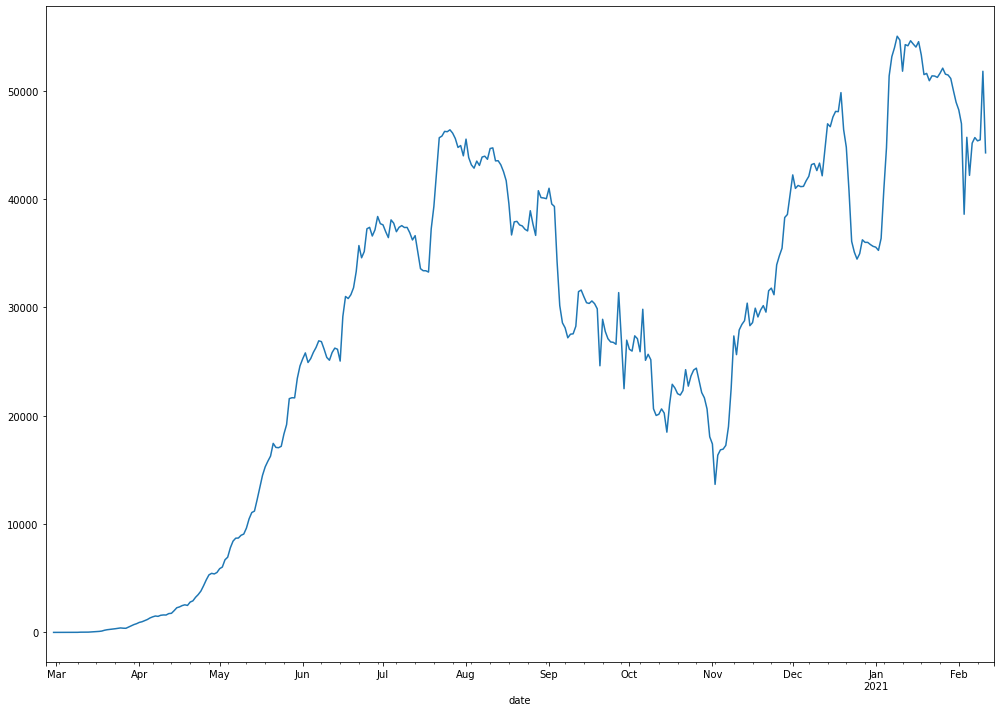

In [67]:
result = seasonal_decompose(df_Brazil_clean["new_cases"])


fig, (ax1) = plt.subplots(figsize=(14,10))

result.trend.plot(ax=ax1)

plt.tight_layout()

O Numero diário de infectados teve seu primeiro pico no final de mes de julho de 2020, depois seguiu caindo até novembro onde os caso dispararam quase verticalmente ate a primeira quizena de dezembro. O ápice foi em 07 de janeiro de 2021, onde foi registrado 87.843 novo casos em 24 horas.

## Número de mortes no Brasil

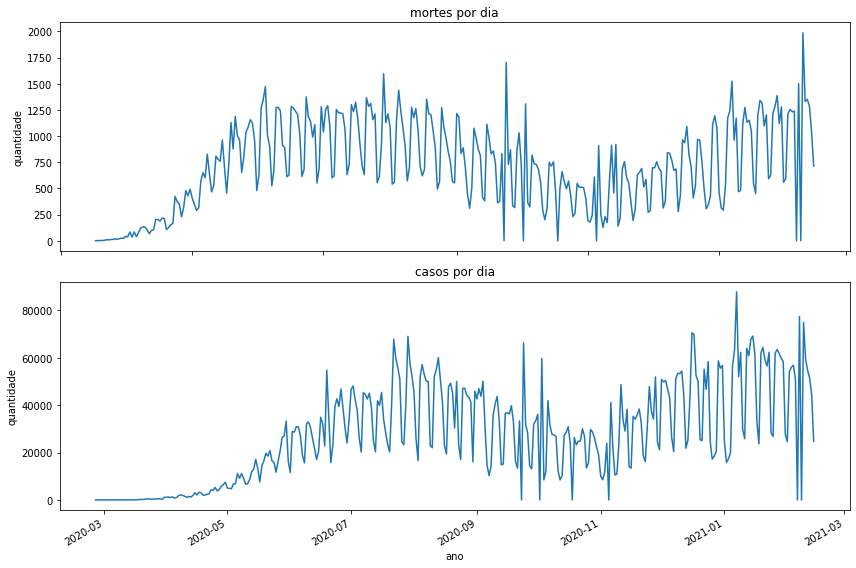

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))


ax[0].plot('new_deaths', data=df_Brazil_clean )

ax[0].set_title("mortes por dia")
ax[0].set_ylabel("quantidade")
ax[0].set_xlabel("ano")

ax[1].plot('new_cases', data=df_Brazil_clean )

ax[1].set_title("casos por dia")
ax[1].set_ylabel("quantidade")
ax[1].set_xlabel("ano")

fig.autofmt_xdate()
plt.tight_layout()

Acima podemos observar que o número de mortes por covid-19 segue a mesma tendencia da quantidade de novos infectados. 

# Comparando Brasil x Mundo

A fim de se ter um panorama vamos, a principio, analizar números gerais.

In [69]:
#removendo linhas de com valores continentais
df_word = df.drop(index=[67995, 21445, 45677, 3617, 21834, 57511, 722, 3231, 67609], axis=0)

### Paises com maiores numeros de casos
+ USA
+ India
+ Brasil
+ Reino Unido
+ Russia
+ França
+ Espanha
+ Itália
+ Truquia
+ Alemanha

In [77]:
df_casos = df_word.loc[df.date == '2021-02-12'].sort_values(by="total_cases", ascending=False).head(10).copy()
df_casos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
65759,USA,North America,United States,2021-02-12,27492023.0,99511.0,96893.000,480887.0,5443.0,3041.286,83056.807,300.635,292.726,1452.819,16.444,9.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48410558.0,35834855.0,12085830.0,2020288.0,1655907.0,14.48,10.71,3.61,4951.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
28691,IND,Asia,India,2021-02-12,10892746.0,12143.0,11206.000,155550.0,103.0,90.286,7893.269,8.799,8.120,112.717,0.075,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765944.0,204789784.0,148.398,0.555,693998.0,0.503,NaN,NaN,samples tested,7967647.0,NaN,NaN,462637.0,364400.0,0.58,NaN,NaN,264.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
9224,BRA,South America,Brazil,2021-02-12,9765455.0,51546.0,45470.000,237489.0,1288.0,1065.000,45942.238,242.502,213.917,1117.283,6.059,5.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4696136.0,4586270.0,109866.0,289301.0,231604.0,2.21,2.16,0.05,1090.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
65369,GBR,Europe,United Kingdom,2021-02-12,4025574.0,15198.0,14666.286,116507.0,759.0,718.571,59299.027,223.875,216.043,1716.215,11.181,10.585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15091696.0,14556827.0,534869.0,549378.0,445204.0,22.23,21.44,0.79,6558.0,86.11,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
51385,RUS,Europe,Russia,2021-02-12,3997898.0,14867.0,15232.000,77911.0,496.0,484.429,27395.161,101.874,104.376,533.877,3.399,3.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
23000,FRA,Europe,France,2021-02-12,3466629.0,665.0,15850.143,80954.0,3.0,315.000,53109.277,10.188,242.827,1240.227,0.046,4.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2839817.0,2225321.0,614496.0,152892.0,108969.0,4.19,3.28,0.91,1606.0,63.89,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
58598,ESP,Europe,Spain,2021-02-12,3056035.0,14581.0,16292.143,64747.0,530.0,480.143,65363.045,311.861,348.459,1384.821,11.336,10.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.30,4.675478e+07,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
31253,ITA,Europe,Italy,2021-02-12,2697296.0,13893.0,12233.857,93045.0,316.0,346.714,44611.552,229.781,202.340,1538.905,5.226,5.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917951.0,1643305

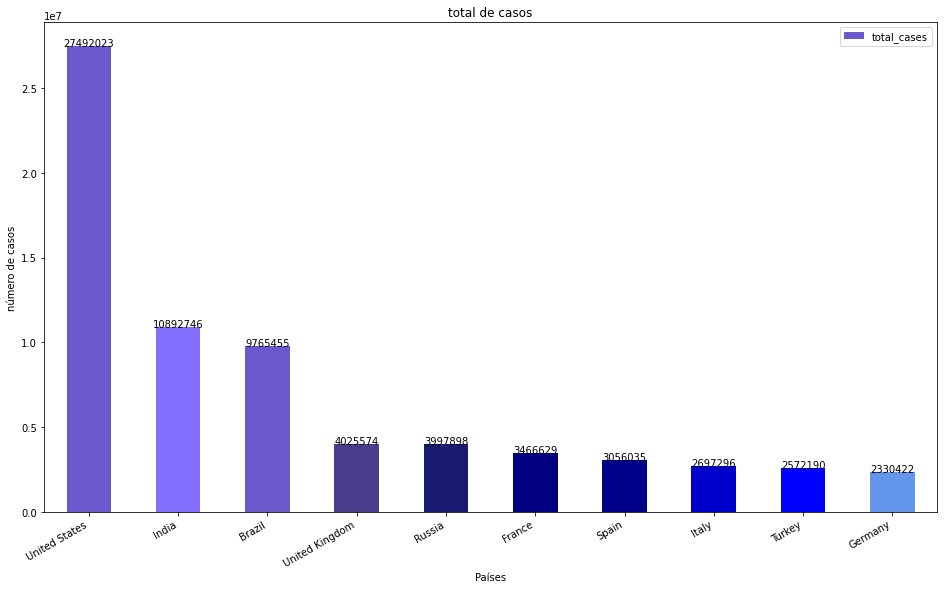

In [134]:
fig, ax = plt.subplots(figsize=(16,10))

df_casos.plot(x="location", y="total_cases", kind="bar", ax=ax, color = ['#6A5ACD',
                                                                        '#836FFF',
                                                                        '#6959CD',
                                                                        '#483D8B',
                                                                        '#191970',
                                                                        '#000080',
                                                                        '#00008B',
                                                                        '#0000CD',
                                                                        '#0000FF',
                                                                        '#6495ED'])

ax.set_xlabel('Países')
ax.set_ylabel('número de casos')
ax.set_title('total de casos')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:.0f}'.format((height)),
    ha='center')

fig.autofmt_xdate()

Em número total de caso confirmados, os Estados Unidos é o país com maior numero de infectados 27.492.023 milhões, quase 3 vezes mais que a India.

### Países com mais mortes
+ USA
+ Brasil
+ México
+ India
+ Reino Unido
+ Itália
+ França
+ Russia
+ Alemanha
+ Espanha

In [79]:
df_max = df_word.loc[df_word.date == '2021-02-12'].sort_values(by="total_deaths", ascending=False).head(10).copy()
df_max

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
65759,USA,North America,United States,2021-02-12,27492023.0,99511.0,96893.000,480887.0,5443.0,3041.286,83056.807,300.635,292.726,1452.819,16.444,9.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48410558.0,35834855.0,12085830.0,2020288.0,1655907.0,14.48,10.71,3.61,4951.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
9224,BRA,South America,Brazil,2021-02-12,9765455.0,51546.0,45470.000,237489.0,1288.0,1065.000,45942.238,242.502,213.917,1117.283,6.059,5.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4696136.0,4586270.0,109866.0,289301.0,231604.0,2.21,2.16,0.05,1090.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
40407,MEX,North America,Mexico,2021-02-12,1978954.0,10388.0,9440.429,172557.0,1323.0,1181.000,15348.730,80.569,73.220,1338.349,10.261,9.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726002.0,640115.0,85887.0,555.0,3669.0,0.56,0.50,0.07,28.0,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
28691,IND,Asia,India,2021-02-12,10892746.0,12143.0,11206.000,155550.0,103.0,90.286,7893.269,8.799,8.120,112.717,0.075,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765944.0,204789784.0,148.398,0.555,693998.0,0.503,NaN,NaN,samples tested,7967647.0,NaN,NaN,462637.0,364400.0,0.58,NaN,NaN,264.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
65369,GBR,Europe,United Kingdom,2021-02-12,4025574.0,15198.0,14666.286,116507.0,759.0,718.571,59299.027,223.875,216.043,1716.215,11.181,10.585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15091696.0,14556827.0,534869.0,549378.0,445204.0,22.23,21.44,0.79,6558.0,86.11,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
31253,ITA,Europe,Italy,2021-02-12,2697296.0,13893.0,12233.857,93045.0,316.0,346.714,44611.552,229.781,202.340,1538.905,5.226,5.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917951.0,1643305.0,1274646.0,67224.0,63958.0,4.83,2.72,2.11,1058.0,78.70,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
23000,FRA,Europe,France,2021-02-12,3466629.0,665.0,15850.143,80954.0,3.0,315.000,53109.277,10.188,242.827,1240.227,0.046,4.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2839817.0,2225321.0,614496.0,152892.0,108969.0,4.19,3.28,0.91,1606.0,63.89,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
51385,RUS,Europe,Russia,2021-02-12,3997898.0,14867.0,15232.000,77911.0,496.0,484.429,27395.161,101.874,104.376,533.877,3.399,3.319,NaN,NaN,NaN,NaN,NaN,N

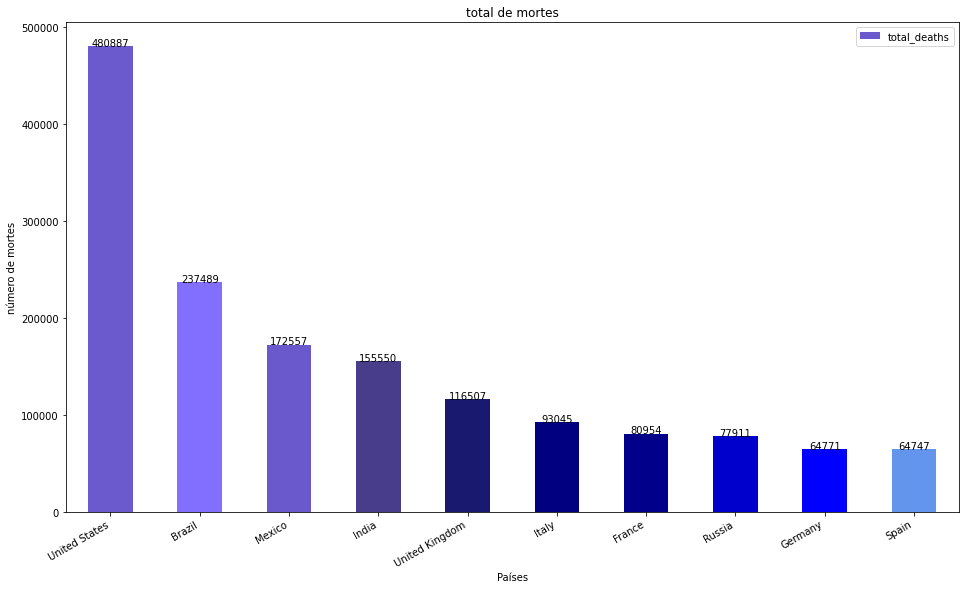

In [122]:
fig, ax = plt.subplots(figsize=(16,10))

df_max.plot(x="location", y="total_deaths", kind="bar", ax=ax, color = ['#6A5ACD',
                                                                        '#836FFF',
                                                                        '#6959CD',
                                                                        '#483D8B',
                                                                        '#191970',
                                                                        '#000080',
                                                                        '#00008B',
                                                                        '#0000CD',
                                                                        '#0000FF',
                                                                        '#6495ED'])

ax.set_xlabel('Países')
ax.set_ylabel('número de mortes')
ax.set_title('total de mortes')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:.0f}'.format((height)),
    ha='center')

fig.autofmt_xdate()

Os Estados Unidos também tem em números absolutos, a maior quantidade de mortos causado pela covid-19. Ao todo são 480.887 de vítimas.

A primeira morte ocorreu em 23 janeiro de 2020 na China, país onde se originou a pandemia.

In [74]:
df_word.loc[df_word["new_deaths"] == 1].sort_values(by="date",  ascending=True).head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
13104,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761


#### Primeiro caso e morte no Brasil

In [75]:
df_Brazil.loc[df_Brazil["new_cases"] == 1].sort_values(by="date",  ascending=True).head(1)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [76]:
df_Brazil.loc[df_Brazil["new_deaths"] == 1].sort_values(by="date",  ascending=True).head(1)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-17,BRA,South America,Brazil,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


No Brasil o primeiro caso foi resgitrado em 26 de fevereiro de 2020. E a primeira morte em 17 de março de 2020. Pouco mais de 1 mês do primeiro caso no mundo.

# Conclusões

Como podemos observar, infelizmente o Brasil figura entre os 10 países mais atingido pela covid-19, somos hoje em números absoluto o terceiro pais com mais caso e o segundo com mais mortes. Estamos vivenciando mais um ciclo de alta nos casos esse que chegaram ao maximo em janeiro de 2021. O número de mortos é proporcianal ao de infectados, por isso é necessario reduzir a taxa de contagio para que por consequencia diminua a de mortalidade pelo virus. Podemos afirmar também que a partir dos dados dispostos em números absolutos os Estados Unidos é o país com os maiores indices do mundo, tanto em caso confirmados quanto em mortes. A Europa é o continente mais afetado pela covid-19, dos 10 paises com mais casos 7 são europeus, e em número de mortos 6 estão entre os primeiros.